<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/mathematics-modeling_%20Notes/%E3%80%8A%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E3%80%8B_%E5%8D%8E%E4%B8%AD%E5%86%9C%E4%B8%9A%E5%A4%A7%E5%AD%A6%20%E7%AC%AC%2016%20%E6%AC%A1%E5%BC%80%E8%AF%BE/%E7%AC%AC%20%E5%9B%9B%20%E8%AE%B2%20%E4%BC%98%E5%8C%96%E5%BB%BA%E6%A8%A1/%E7%AC%AC%E5%9B%9B%E8%AE%B2%20%E5%BB%BA%E6%A8%A1%E4%BC%98%E5%8C%96%20%E5%8D%95%E5%85%83%E6%B5%8B%E8%AF%95%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

链接： [《数学建模》_华中农业大学 第 16 次开课](https://www.icourse163.org/learn/HZAU-1001658002?tid=1472021457#/learn/content)

## 卷 4

### 题 6 【决策参数的值为 0 或 1】王先生出门旅行需要将一些用品装入一个旅行背包

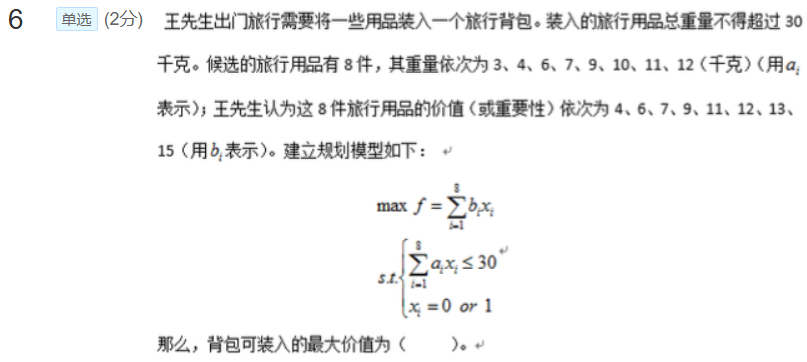

In [16]:
# 库函数官方示例：https://www.cvxpy.org/examples/index.html

# !pip install cvxpy

import cvxpy as cp
import numpy as np

# 输入目标函数系数
c = np.array([4, 6, 7, 9, 11, 12, 13, 15])  # 目标的参数系数

x = cp.Variable(8, integer=True) # 构造决策变量
# 构造目标函数
obj = cp.Maximize( cp.sum( x @ c ) )  # 最大化 Maximize   最小化 Minimize

# 输入约束条件
A = np.array([[3, 4, 6, 7, 9, 10, 11, 12]])
b = np.array([30])
constraints = [ A @ x <= b,
         x >= 0,
         x <= 1]  # 将非负约束加到约束里，极大加快求解速度
prob = cp.Problem(obj, constraints)  #  构造模型
prob.solve()  #  模型求解
print("是否优化成功：", prob.status)
print("最大值：", prob.value)
print("最优参数：", x.value)

是否优化成功： optimal
最大值： 38.0
最优参数： [1. 1. 0. 0. 0. 0. 1. 1.]


## 卷 3

### 题 10  cvxpy 求解

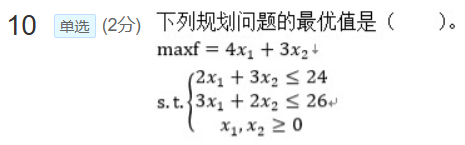

In [1]:
!pip install cvxpy

In [5]:
# 库函数官方示例：https://www.cvxpy.org/examples/index.html

# !pip install cvxpy

import cvxpy as cp
import numpy as np
#输入目标函数系数
c = np.array([4, 3])  # 目标的参数系数

x = cp.Variable(2, integer=True) # 构造决策变量
# 构造目标函数
obj = cp.Maximize( cp.sum( x @ c ) )  # 最大化 Maximize   最小化 Minimize

# 输入约束条件
A = np.array([[2, 3],
        [3, 2]])
b = np.array([24, 26])
constraints = [ A @ x <= b,
         x >= 0]  # 将非负约束加到约束里，极大加快求解速度
prob = cp.Problem(obj, constraints)  #  构造模型
prob.solve()  #  模型求解
print("是否优化成功：", prob.status)
print("最大值：", prob.value)
print("最优参数：", x.value)

# 36

是否优化成功： optimal
最大值： 36.0
最优参数： [6. 4.]


### ▢ 题 11 产地-销售地  与答案不一致

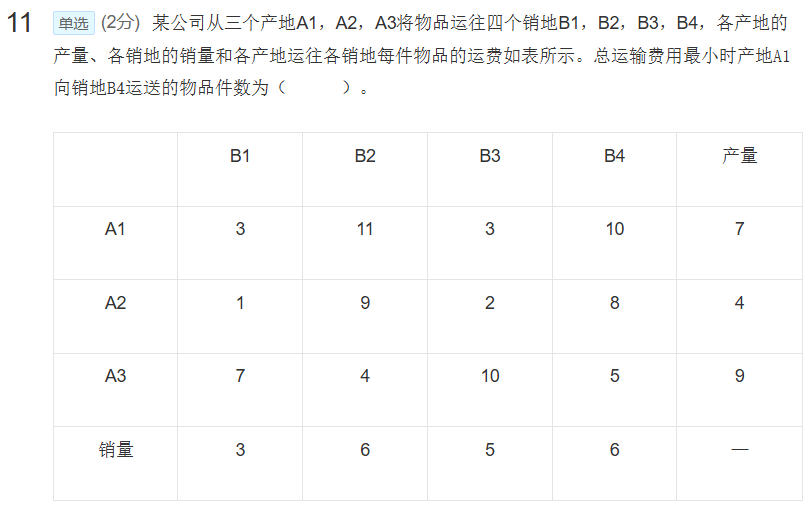

In [6]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 69.9 MB/s eta 0:00:00


In [9]:
"""
用 PuLP 求解 货物配送问题
作者： 姓名，时间
"""
# https://coin-or.github.io/pulp/main/index.html

# !pip install pulp


from pulp import *

######### 1、给相关节点命名，以节点名称为键， 相关参数为值创建字典 #########
# Creates a list of all the supply nodes
Warehouses = ["A1", "A2", "A3"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"A1": 7,
      "A2": 4,
      "A3": 9}

# Creates a list of all demand nodes
Customers = ["B1", "B2", "B3", "B4"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {
    "B1": 3,
    "B2": 6,
    "B3": 5,
    "B4": 6
}

######### 2、将成本数据输入到一个列表中 #########
# Creates a list of costs of each transportation path
costs = [  # 客户 Customers
   # B1 B2 B3 B4
    [3, 11, 3, 10],  # A1   仓库 Warehouses
    [1, 9, 2, 8],  # A2
    [7, 4, 10, 5],  # A3
]

# The cost data is made into a dictionary
costs = makeDict([Warehouses, Customers], costs, 0)
# costs[“A1”][“B1”]： 从产地 A1 到 销售地 B1 的成本


######### 3、LpProblem 函数创建 prob 变量 并求解 #########
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("货物配送问题", LpMinimize)

# 创建包含 所有可能的传输路径 的元组列表
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w, c) for w in Warehouses for c in Customers]

# 创建 包含 LP 变量， 名为 vars 的字典
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (Warehouses, Customers), 0, None, LpInteger) # 产品数量为整数

# 添加目标函数
# The objective function is added to 'prob' first
prob += (
    lpSum([vars[w][c] * costs[w][c] for (w, c) in Routes]),
    "运输成本",
)

# 添加约束
# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += (
        lpSum([vars[w][c] for c in Customers]) <= supply[w],
        f"从产地 {w} 运出的货物数量",
    )

# The demand minimum constraints are added to prob for each demand node (bar)
for c in Customers:
    prob += (
        lpSum([vars[w][c] for w in Warehouses]) == demand[c],
        f"运到销售地 {c} 的货物数量",
    )

######### 4、求解并打印相关结果  #########

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("最低的运输成本 = ", value(prob.objective))

# 猜测实际要问这个 Route_A1_B1 = 2.0

求解状态: Optimal
Route_A1_B1 = 2.0
Route_A1_B2 = 0.0
Route_A1_B3 = 5.0
Route_A1_B4 = 0.0
Route_A2_B1 = 1.0
Route_A2_B2 = 0.0
Route_A2_B3 = 0.0
Route_A2_B4 = 3.0
Route_A3_B1 = 0.0
Route_A3_B2 = 6.0
Route_A3_B3 = 0.0
Route_A3_B4 = 3.0
最低的运输成本 =  85.0


### 题 12  某船能装载的总体积为 1000。注意数量只有一个

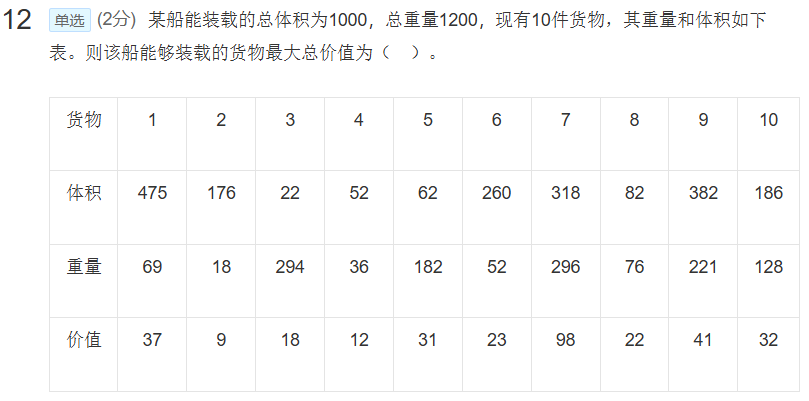

In [12]:
# 库函数官方示例：https://www.cvxpy.org/examples/index.html

# !pip install cvxpy

import cvxpy as cp
import numpy as np

# 输入目标函数系数
c = np.array([37, 9, 18, 12, 31, 23, 98, 22, 41, 32])  # 目标的参数系数

x = cp.Variable(10, integer=True) # 构造决策变量
# 构造目标函数
obj = cp.Maximize( cp.sum( x @ c ) )  # 最大化 Maximize   最小化 Minimize

# 输入约束条件
A = np.array([[475, 176, 22, 52, 62, 260, 318, 82, 382, 186],
        [69, 18, 294, 36, 182, 52, 296, 76, 221, 128]])
b = np.array([1000, 1200])
constraints = [ A @ x <= b,
         x >= 0,
         x <= 1]  # 将非负约束加到约束里，极大加快求解速度
prob = cp.Problem(obj, constraints)  #  构造模型
prob.solve()  #  模型求解
print("是否优化成功：", prob.status)
print("最大值：", prob.value)
print("最优参数：", x.value)

# 316

是否优化成功： optimal
最大值： 236.0
最优参数： [0. 0. 1. 1. 1. 1. 1. 1. 0. 1.]


## 卷 2

### 题 3

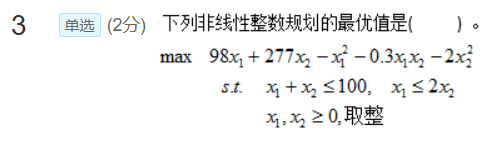

In [ ]:
"""
scipy.optimize.minimize 求解非线性规划
"""

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#minimize

from scipy.optimize import minimize

# 目标函数：注意写成最小化形式 ！！！
func = lambda x: -98 * x[0] - 277 * x[1] + x[0]**2 + 0.3 * x[0] * x[1] + 2 * x[1]**2

# 约束 不等式要求是 ≥ 形式
cons = ({'type': 'ineq', 'fun': lambda x:  -x[0] - x[1] + 100},
     {'type': 'ineq', 'fun': lambda x:  -x[0] +  2 * x[1]},)

# 边界
# bnds = ((0, None))
x_0 = (50, 50)  #  x 的初始猜测值
res = minimize(func, x_0, method='SLSQP', bounds=[(0, None)]*2, constraints=cons)

print("目标的最大值：", -res.fun)   # res.fun
print("最优解 x =", [round(xi) for xi in res.x])
print("是否优化成功：", res.message)

目标的最大值： 11077.870370370358
最优解 x = [35, 65]
是否优化成功： Optimization terminated successfully


## 卷 1

### 题 4  10 件物品 - 箱子  cvxpy 求解

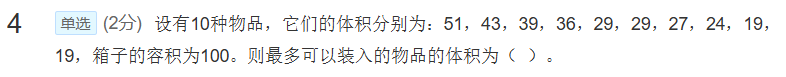

In [ ]:
!pip install cvxpy

In [13]:
# 库函数官方示例：https://www.cvxpy.org/examples/index.html

# !pip install cvxpy

import cvxpy as cp
import numpy as np
#输入目标函数系数
v = np.array([51, 43, 39, 36, 29, 29, 27, 24, 19, 19])  # 目标的参数系数

x = cp.Variable(10, integer=True) # 构造决策变量
# 构造目标函数
obj = cp.Maximize( cp.sum( x @ v ) )  # 最大化 Maximize   最小化 Minimize
# 输入约束条件
constraints = [ cp.sum( x @ v ) <= 100,
         x <= 1, # 注意每种物品只有一件 ！！
         x >= 0]  # 将非负约束加到约束里，极大加快求解速度
prob = cp.Problem(obj, constraints)  #  构造模型
prob.solve()  #  模型求解
print("是否优化成功：", prob.status)
print("最大值：", prob.value)
print("最优参数：", x.value)

是否优化成功： optimal
最大值： 99.0
最优参数： [0. 0. 1. 1. 0. 0. 0. 1. 0. 0.]


### 题 9  自来水运输问题  cvxpy 求解

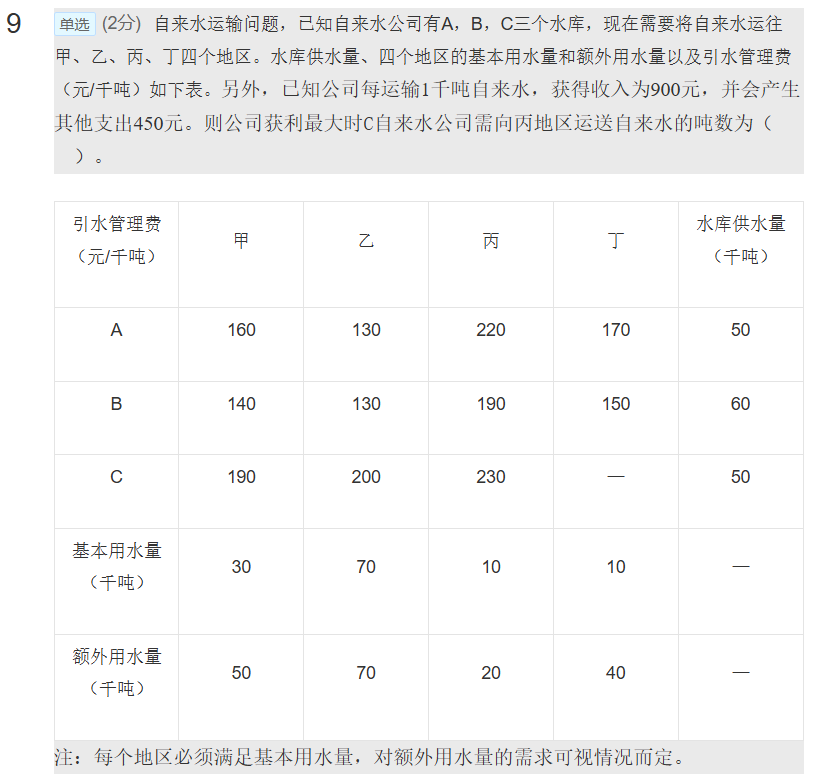

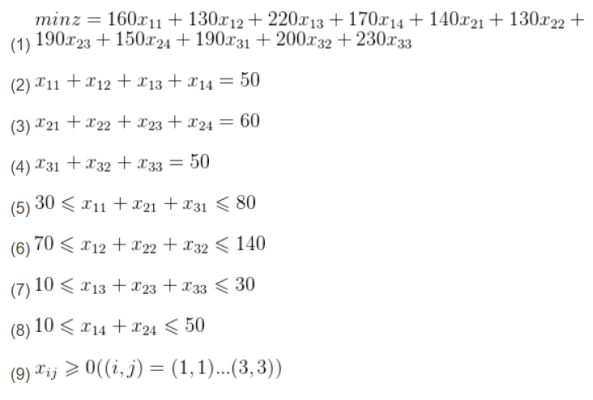

In [ ]:
# 库函数官方示例：https://www.cvxpy.org/examples/index.html

# !pip install cvxpy

import cvxpy as cp
import numpy as np

# 输入目标函数系数   最小化引水管理费
c = np.array([160, 130, 220, 170,
        140, 130, 190, 150,
        190, 200, 230, 10000])  # 用 很大的数 表示 无法选择的路径 的成本。使得优化模型不选该路径

x = cp.Variable(12, integer=True) # 构造决策变量

# 构造目标函数
obj = cp.Minimize( cp.sum( x @ c ) )  # 最大化 Maximize   最小化 Minimize

# 输入约束条件系数 不等式部分
left = np.array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]])
right_min = np.array([30, 70, 10, 10]) # 输入约束条件下限值
right_max = np.array([80, 140, 30, 50]) # 输入约束条件上限值


# 构造约束条件
constraints = [ cp.sum( x[0:4] ) == 50,
        cp.sum( x[4:8] ) == 60,
        cp.sum( x[8:11] ) == 50,
        left @ x <= right_max,
        left @ x >= right_min,
         x >= 0]  # 将非负约束加到约束里，极大加快求解速度

prob = cp.Problem(obj, constraints)  #  构造模型
prob.solve()  #  模型求解
print("是否优化成功：", prob.status)
print("最大值：", prob.value)
print("最优参数：", x.value)

# 10

是否优化成功： optimal
最大值： 24400.0
最优参数： [ 0. 50.  0.  0.  0. 50.  0. 10. 40.  0. 10.  0.]


In [18]:
print(160 * 450 - 24400 )

47600


### 题 10  仓库-客户   pulp 求解货物配送问题

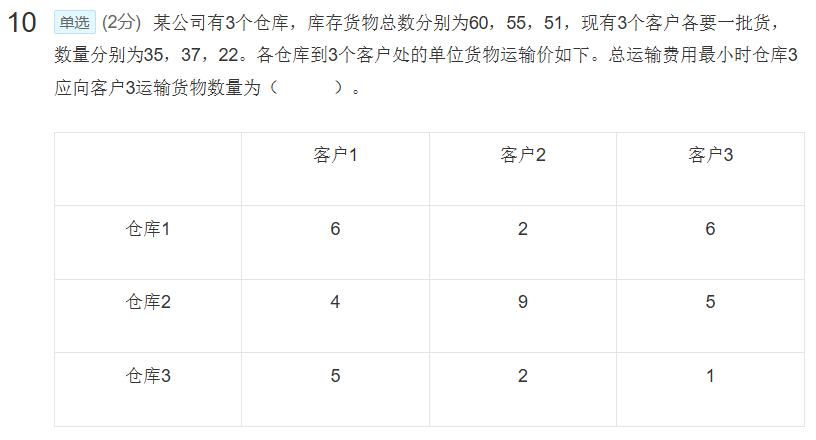

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 28.4 MB/s eta 0:00:00


In [ ]:
"""
用 PuLP 求解 货物配送问题
作者： 姓名，时间
"""
# https://coin-or.github.io/pulp/main/index.html

# !pip install pulp


from pulp import *

######### 1、给相关节点命名，以节点名称为键， 相关参数为值创建字典 #########
# Creates a list of all the supply nodes
Warehouses = ["仓库1", "仓库2", "仓库3"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"仓库1": 60,
      "仓库2": 55,
      "仓库3": 51}

# Creates a list of all demand nodes
Customers = ["客户1", "客户2", "客户3"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {
    "客户1": 35,
    "客户2": 37,
    "客户3": 22,
}

######### 2、将成本数据输入到一个列表中 #########
# Creates a list of costs of each transportation path
costs = [  # 客户 Customers
   # 客户1 客户2 客户3
    [6, 2, 6],  # 仓库1   仓库 Warehouses
    [4, 9, 5],  # 仓库2
    [5, 2, 1],  # 仓库3
]

# The cost data is made into a dictionary
costs = makeDict([Warehouses, Customers], costs, 0)
# costs[“A1”][“B1”]： 从加工厂 A1 到 销售地 B1 的成本


######### 3、LpProblem 函数创建 prob 变量 并求解 #########
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("货物配送问题", LpMinimize)

# 创建包含 所有可能的传输路径 的元组列表
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w, c) for w in Warehouses for c in Customers]

# 创建 包含 LP 变量， 名为 vars 的字典
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (Warehouses, Customers), 0, None, LpInteger) # 产品数量为整数

# 添加目标函数
# The objective function is added to 'prob' first
prob += (
    lpSum([vars[w][c] * costs[w][c] for (w, c) in Routes]),
    "运输成本",
)

# 添加约束
# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += (
        lpSum([vars[w][c] for c in Customers]) <= supply[w],
        f"从 {w} 运出的货物数量",
    )

# The demand minimum constraints are added to prob for each demand node (bar)
for c in Customers:
    prob += (
        lpSum([vars[w][c] for w in Warehouses]) >= demand[c],
        f"运给 {c} 的货物数量",
    )

######### 4、求解并打印相关结果  #########

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("最低的运输成本 = ", value(prob.objective))

# 22

求解状态: Optimal
Route_仓库1_客户1 = 0.0
Route_仓库1_客户2 = 37.0
Route_仓库1_客户3 = 0.0
Route_仓库2_客户1 = 35.0
Route_仓库2_客户2 = 0.0
Route_仓库2_客户3 = 0.0
Route_仓库3_客户1 = 0.0
Route_仓库3_客户2 = 0.0
Route_仓库3_客户3 = 22.0
最低的运输成本 =  236.0


### ▢ 题  11  结果不一致

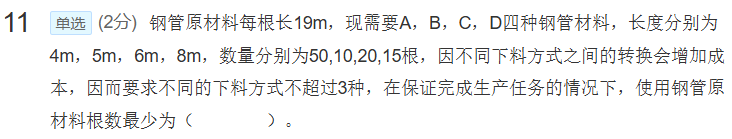

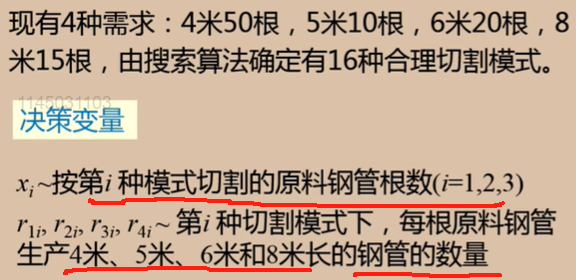

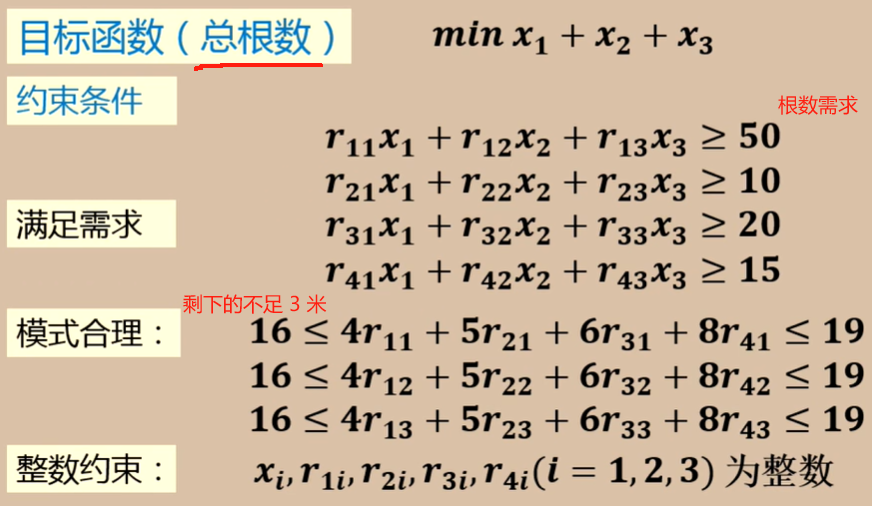

<font color=blue><font size=4>非线性

In [ ]:
"""
scipy.optimize.minimize 求解非线性规划
"""

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#minimize

from scipy.optimize import minimize

# 目标函数：注意写成最小化形式 ！！！
func = lambda x: x[0] + x[1] + x[2]

# 约束 不等式要求是 ≥ 形式
cons = ({'type': 'ineq', 'fun': lambda x:  x[3] * x[0] +  x[7] * x[1] + x[11] * x[2] - 50},
     {'type': 'ineq', 'fun': lambda x:  x[4] * x[0] +  x[8] * x[1] + x[12] * x[2] - 10},
     {'type': 'ineq', 'fun': lambda x:  x[5] * x[0] +  x[9] * x[1] + x[13] * x[2] - 20},
     {'type': 'ineq', 'fun': lambda x:  x[6] * x[0] +  x[10] * x[1] + x[14] * x[2] - 15},
     {'type': 'ineq', 'fun': lambda x:  4 * x[3] +  5 * x[4] + 6 * x[5] + 8 * x[6] - 16},
     {'type': 'ineq', 'fun': lambda x:  -4 * x[3] -  5 * x[4] - 6 * x[5] - 8 * x[6] + 19},
     {'type': 'ineq', 'fun': lambda x:  4 * x[7] +  5 * x[8] + 6 * x[9] + 8 * x[10] - 16},
     {'type': 'ineq', 'fun': lambda x:  -4 * x[7] -  5 * x[8] - 6 * x[9] - 8 * x[10] + 19},
     {'type': 'ineq', 'fun': lambda x:  4 * x[11] +  5 * x[12] + 6 * x[13] + 8 * x[14] - 16},
     {'type': 'ineq', 'fun': lambda x:  -4 * x[11] -  5 * x[12] - 6 * x[13] - 8 * x[14] + 19},)

# 边界
# bnds = ((0, None))
x_0 = (10, 50, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2)  #  x 的初始猜测值
# 0 1 0
# 1 0 0
# 1 1 0
# 1 1 2
res = minimize(func, x_0, method='SLSQP', bounds=[(0, None)]*15, constraints=cons)
# (100, 200, 400) 为对 x 的初始猜测

print("目标的最小值：", res.fun)  # 总根数
print("最优解 x =", [round(xi) for xi in res.x])
print("是否优化成功：", res.message)

目标的最小值： 25.789473684909318
最优解 x = [0, 26, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2]
是否优化成功： Optimization terminated successfully


28

 ### 题 12 指派问题 外商-项目 用 scipy.optimize.linear_sum_assignment 求解

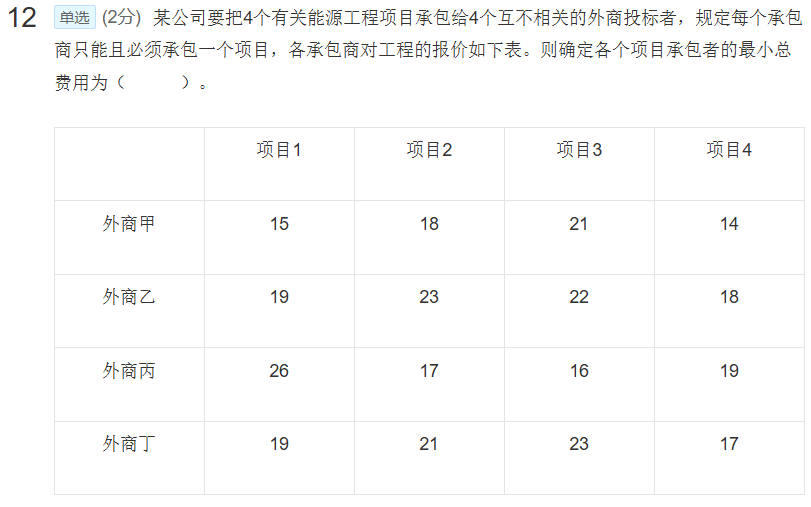

In [ ]:
"""
用 scipy.optimize.linear_sum_assignment 求解
"""

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html#scipy.optimize.linear_sum_assignment

# 根据题目信息， 输入 cost
import numpy as np
cost = np.array([[15, 18, 21, 14],
     [19, 23, 22, 18],
     [26, 17, 16, 19],
     [19, 21, 23, 17]])

from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(cost)
print("指派的对应任务的编号为： ", col_ind+1)
print("最小总费用为：", cost[row_ind, col_ind].sum())

指派的对应任务的编号为：  [4 1 3 2]
最小总费用为： 70


### 题 13  用 pulp 求解并进行敏感性分析

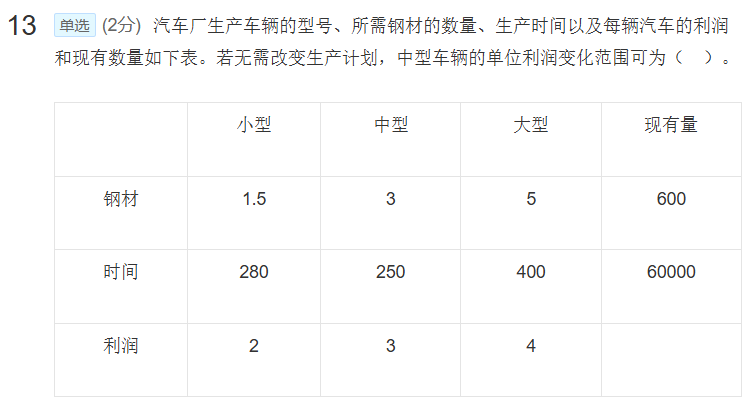

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 53.3 MB/s eta 0:00:00


In [ ]:
# https://coin-or.github.io/pulp/main/index.html

# !pip install pulp

from pulp import *
import numpy as np

def solve_lp():
  problem = LpProblem("生产计划问题", LpMaximize)
  x1 = LpVariable("生产小型车辆的数量 x1", lowBound=0) # 若是直接规定为整数，无法进行 敏感性分析
  x2 = LpVariable("生产中型车辆的数量 x2", lowBound=0)  # lowBound=0
  x3 = LpVariable("生产大型车辆的数量 x3", lowBound=0)
  problem += 2 * x1 + 3 * x2 + 4 * x3, "总利润"  # 目标函数
  # 约束
  problem += 1.5 * x1 + 3 * x2 + 5 * x3 <= 600, "钢材约束"
  problem += 280 * x1 + 250 * x2 + 400 * x3 <= 60000, "时间约束"  # 字典名称不能有空格

  problem.solve()
  print("求解状态:", LpStatus[problem.status])

  # 优化的参数
  for v in problem.variables():
      print(v.name, "=", v.varValue)

  print("最大利润 = ", value(problem.objective))
  return problem

def sensitivity_analysis(problem):
  material_shadow_price = problem.constraints['钢材约束'].pi
  time_shadow_price = problem.constraints['时间约束'].pi
  print("\n敏感性分析 (Sensitivity Analysis):")
  print(f"钢材 约束: Shadow Price = {material_shadow_price}")
  print(f"时间 约束: Shadow Price = {time_shadow_price}")

problem = solve_lp()
sensitivity_analysis(problem)

求解状态: Optimal
生产中型车辆的数量_x2 = 167.74194
生产大型车辆的数量_x3 = 0.0
生产小型车辆的数量_x1 = 64.516129
最大利润 =  632.2580780000001

敏感性分析 (Sensitivity Analysis):
钢材 约束: Shadow Price = 0.7311828
时间 约束: Shadow Price = 0.0032258065


### 题  14 pulp 处理买入还是卖出问题

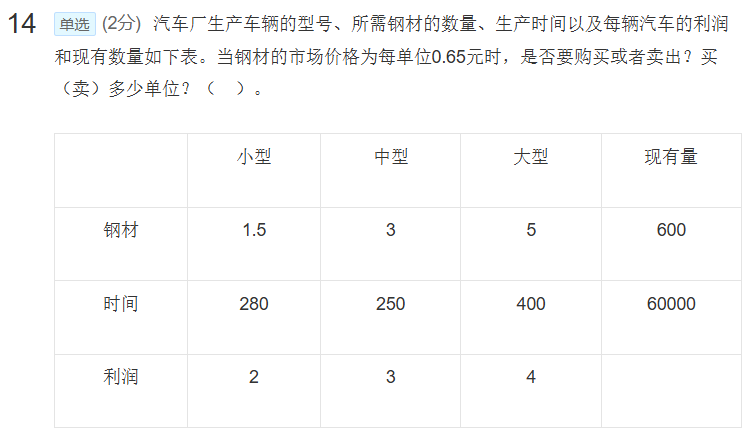

<font color=blue>基于 题 13 的求解，钢材 的影子价格 0.73 **高于** 其当前的市场价格为  0.65，**可考虑购入钢材**，获取更多利润。

！！！ **可以不管影子价格，直接将买或卖的数量作为参数加入规划**

In [ ]:
# https://coin-or.github.io/pulp/main/index.html

# !pip install pulp

import pulp

# 定义问题
problem = pulp.LpProblem("Maximize_Profit", pulp.LpMaximize)

# 定义变量
x_small = pulp.LpVariable("x_small", lowBound=0, cat='Continuous')
x_medium = pulp.LpVariable("x_medium", lowBound=0, cat='Continuous')
x_large = pulp.LpVariable("x_large", lowBound=0, cat='Continuous')
steel_buy = pulp.LpVariable("steel_buy", lowBound=0, cat='Continuous')
steel_sell = pulp.LpVariable("steel_sell", lowBound=0, cat='Continuous')

# 目标函数：最大化利润
problem += 2 * x_small + 3 * x_medium + 4 * x_large - 0.65 * (steel_buy - steel_sell)  # 增加 通过买或卖钢材获取的利润部分

# 约束条件
# 钢材约束
problem += 1.5 * x_small + 3 * x_medium + 5 * x_large - steel_buy + steel_sell <= 600

# 时间约束
problem += 280 * x_small + 250 * x_medium + 400 * x_large <= 60000

# 求解问题
problem.solve()

# 输出结果
print(f"生产小型汽车数量: {x_small.value()}")
print(f"生产中型汽车数量: {x_medium.value()}")
print(f"生产大型汽车数量: {x_large.value()}")
print(f"购买钢材数量: {steel_buy.value()}")
print(f"出售钢材数量: {steel_sell.value()}")

生产小型汽车数量: 0.0
生产中型汽车数量: 240.0
生产大型汽车数量: 0.0
购买钢材数量: 120.0
出售钢材数量: 0.0
